<table>
  <tr>
      <td><div align="left"><font size="20" >Tutorial B.1 - Basic Geometry</font></div></td>
     <td><img src="../../shared/common/RVSS-logo.png" width="400"></td>
  </tr>
</table>

## Table of Content

1. #### Rotation Matrices
2. #### Epipolar Lines
3. #### Fundamental Matrix


## 1. Rotation Matrices

In this section you will create a rotational matrix, apply the rotational matrix to a set of points, then plot the rotated set of points to see the effects.


We will begin by importing all the libraries we need and setting up the Jupyter notebook environment. Execute the following block of code.

In [1]:
# this line tells Jupyter that we are rendering plots in "notebook" style
%matplotlib notebook

# import libraries we need
import math
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Next, using the code below, we will create a list of points in 3D space and plot the points.

<IPython.core.display.Javascript object>


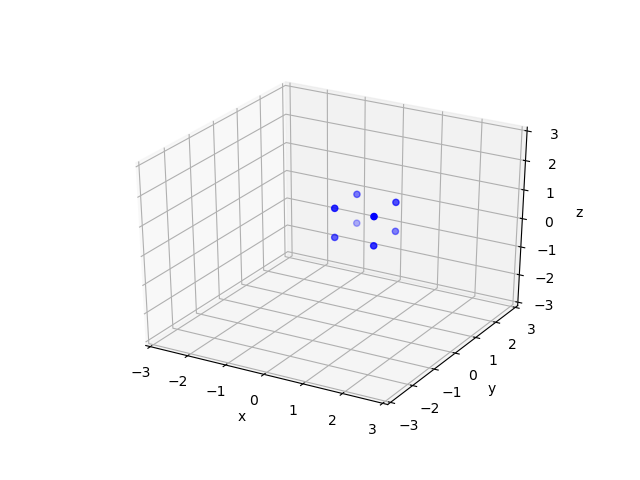

List of points (each column represents a point in 3D space)
[[0 1 0 0 1 0 1 1]
 [0 0 1 0 1 1 0 1]
 [0 0 0 1 0 1 1 1]]


In [2]:
# create a 3D plot figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-3,3),ax.set_ylim(-3,3),ax.set_zlim(-3,3)
ax.set_xlabel('x'),ax.set_ylabel('y'),ax.set_zlabel('z')

# create our points in 3D space
# these are the 8 corners of a cube that ranges from 0 to 1 along all axes
pt = np.array([[ 0, 0, 0 ],
               [ 1, 0, 0 ],
               [ 0, 1, 0 ],
               [ 0, 0, 1 ],
               [ 1, 1, 0 ],
               [ 0, 1, 1 ],
               [ 1, 0, 1 ],
               [ 1, 1, 1 ],
               ])
pt = pt.transpose() # transpose the matrix so that the points are in columns, in preparation for matrix operations later on.

# print out the points
print('List of points (each column represents a point in 3D space)')
print(pt)


# plot the points
ax.scatter(pt[0,:],pt[1,:],pt[2,:],'x', color='blue')


Drag around the 3D plot area with the mouse to rotate the plot around and see the cube from different angles.

Now, let's create a rotational matrix

In [3]:
## TODO: 
# create a rotational matrix that rotates a point by 45 deg about the x axis
# HINT: the math.cos() and math.sin() functions take angles in radians. Use math.radians() to convert from deg to rad

# Store your rotational matrix in this variable
Rotx = np.array([[1,0,0],[0,1,0],[0,0,1]]) # identity matrix


## End TODO ##

# print out the rotation matrix
print(Rotx)



[[1 0 0]
 [0 1 0]
 [0 0 1]]


Does the rotation matrix look like what you expected?

Now let's apply the rotation to our list of points by multiplying the rotation matrix with our list of points

Calculating Rotx . pt

Rotx =
[[1 0 0]
 [0 1 0]
 [0 0 1]]

pt =
[[0 1 0 0 1 0 1 1]
 [0 0 1 0 1 1 0 1]
 [0 0 0 1 0 1 1 1]]

Answer =
[[0 1 0 0 1 0 1 1]
 [0 0 1 0 1 1 0 1]
 [0 0 0 1 0 1 1 1]]


<IPython.core.display.Javascript object>


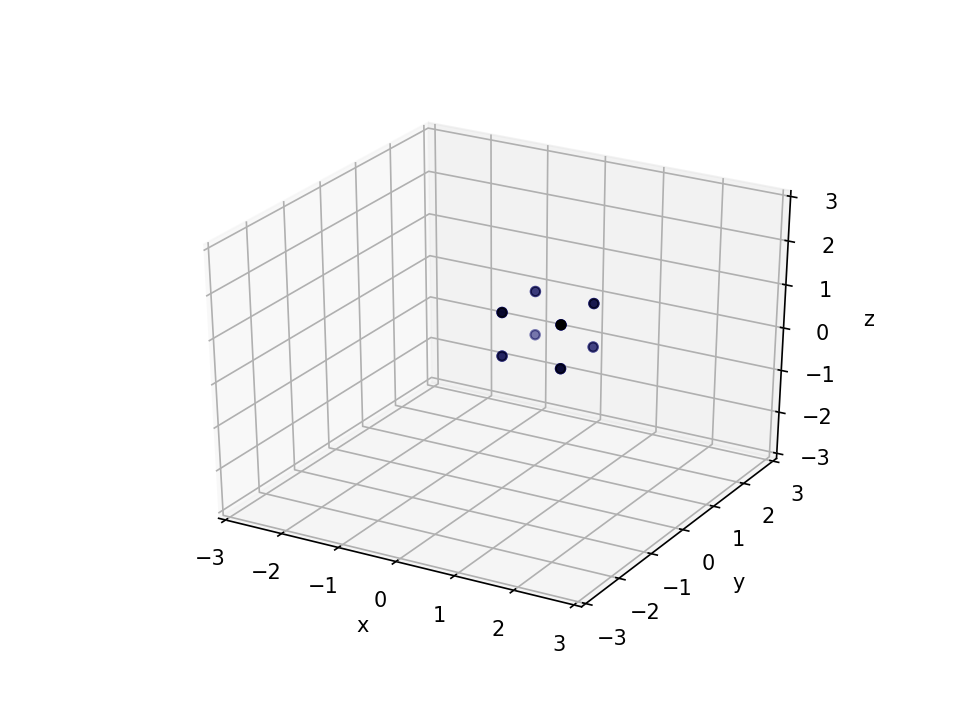

In [4]:
## TODO:
# Multiply the rotation matrix by the list of points to apply the rotation to the points
# HINT: Matrix multiplication between A and B can be computed as A.dot(B)

# Store your rotated list of points in this variable
pt_new = pt


## End TODO ##

# print out the matrix multiplication 
print("Calculating Rotx . pt\n")
print("Rotx =")
print(Rotx)
print("\npt =")
print(pt)
print("\nAnswer =")
print (pt_new.round(3))

# create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-3,3),ax.set_ylim(-3,3),ax.set_zlim(-3,3)
ax.set_xlabel('x'),ax.set_ylabel('y'),ax.set_zlabel('z')

# plot the original points in blue, and rotated points in black
ax.scatter(pt[0,:],pt[1,:],pt[2,:],'x', color='blue')
ax.scatter(pt_new[0,:],pt_new[1,:],pt_new[2,:],'x', color='black')

You should see that the new set of points are rotated about the x-axis by 45 deg

EXTRA: 

If you have time:

1) Try rotating the cube by different angles.

2) Try rotating the cube about different axes.

3) Try adding translation to shift the cube around (You can do this using either inhomogeneous or homogeneous coordinates).

## 2. Translations

In this section you will apply a translation to the rotated coordinates


We start by creating a column vector that contains the shift we want to apply in the x, y and z directions
We make this be a 3x1 matrix (3 rows, 1 column) by using nested square brackets

In [5]:
translation = np.array([[0.1],[0.2],[0.3]])
print(translation)

[[0.1]
 [0.2]
 [0.3]]


We can now add the translation to the rotated points.  These matrices are different sizes (3x8) and (3x1) but numpy  is smart enough to figure out that we want to add the translation vector to every vector in the points matrix.  It does this by "broadcasting" the translation vector to every column of the points matrix

In [6]:
## TODO ##
# Add the translation vector onto each of the points in pt_new and store the results in pt_new_t

pt_new_t = pt_new
print(pt_new_t)

[[ 0.1         1.1         0.1         0.1         1.1         0.1
   1.1         1.1       ]
 [ 0.2         0.2         0.90710678 -0.50710678  0.90710678  0.2
  -0.50710678  0.2       ]
 [ 0.3         0.3         1.00710678  1.00710678  1.00710678  1.71421356
   1.00710678  1.71421356]]


We can now plot the new points

<IPython.core.display.Javascript object>


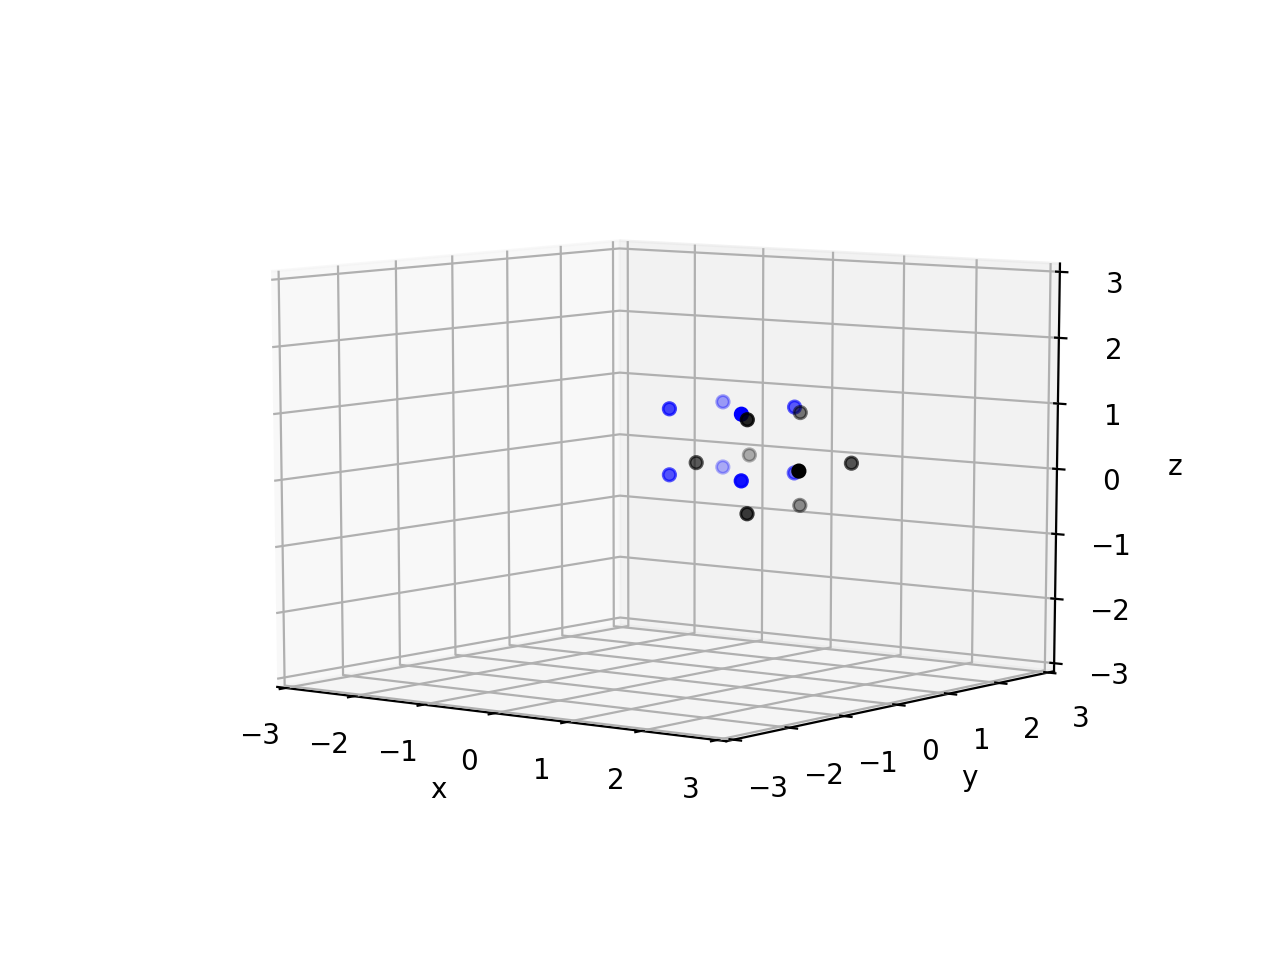

In [7]:
# create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-3,3),ax.set_ylim(-3,3),ax.set_zlim(-3,3)
ax.set_xlabel('x'),ax.set_ylabel('y'),ax.set_zlabel('z')

# plot the original points in blue, and rotated points in black
ax.scatter(pt[0,:],pt[1,:],pt[2,:],'x', color='blue')
ax.scatter(pt_new_t[0,:],pt_new_t[1,:],pt_new_t[2,:],'x', color='black')

## 3. Homogeneous coordinates

in this section we will combine the operations of rotating and translating into a single matrix operation

First we extend our points into homogeneous coordinates by adding a row of ones at the bottom

In [13]:
h_pt = np.concatenate((pt, np.ones([1,8])), axis=0)
print(h_pt)

[[0. 1. 0. 0. 1. 0. 1. 1.]
 [0. 0. 1. 0. 1. 1. 0. 1.]
 [0. 0. 0. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]]


Now we can apply transformations to these coordinates using 4x4 matrices

First we build a 4x4 matrix to apply the rotation and translation

The matrix has the structure:

[... R ... t ]  
[ 0 0 0 1 ]

In [15]:
## TODO
# fill in the body of the function so that it rotates around the x axis by an angle specified by the argument degrees
# and the apply a translation of t
def RxT(degrees, t):
    return np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])

Transformation = RxT(45,np.array([0.1,0.2,0.3]))

print(Transformation)

[[ 1.          0.          0.          0.1       ]
 [ 0.          0.70710678 -0.70710678  0.2       ]
 [ 0.          0.70710678  0.70710678  0.3       ]
 [ 0.          0.          0.          1.        ]]


In [17]:
h_pt_new = Transformation.dot(h_pt)
print(h_pt_new)

[[ 0.1         1.1         0.1         0.1         1.1         0.1
   1.1         1.1       ]
 [ 0.2         0.2         0.90710678 -0.50710678  0.90710678  0.2
  -0.50710678  0.2       ]
 [ 0.3         0.3         1.00710678  1.00710678  1.00710678  1.71421356
   1.00710678  1.71421356]
 [ 1.          1.          1.          1.          1.          1.
   1.          1.        ]]


And display it:

<IPython.core.display.Javascript object>


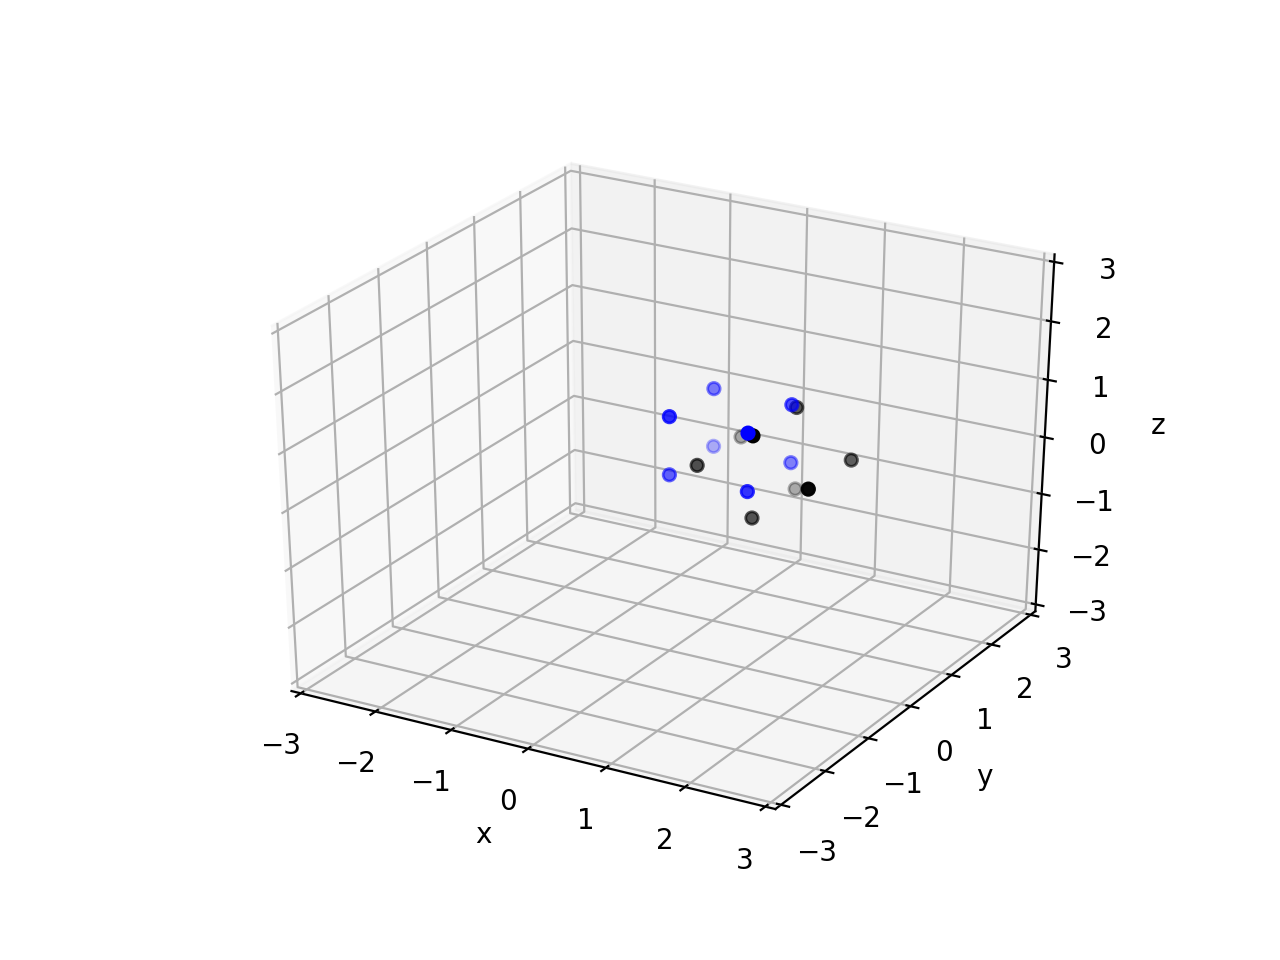

In [18]:
# create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-3,3),ax.set_ylim(-3,3),ax.set_zlim(-3,3)
ax.set_xlabel('x'),ax.set_ylabel('y'),ax.set_zlabel('z')

# plot the original points in blue, and rotated points in black
ax.scatter(h_pt[0,:],h_pt[1,:],h_pt[2,:],'x', color='blue')
ax.scatter(h_pt_new[0,:],h_pt_new[1,:],h_pt_new[2,:],'x', color='black')

### ============================= End of Rotation Matrices =============================